In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your renamed file (e.g., env.txt)



Saving env.txt to env.txt


In [ ]:
!mv env.txt .env


In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()  # This will read from the .env file


True

In [ ]:
import psycopg2

DB_CONFIG = {
    "dbname": os.getenv("DB_NAME"),
    "user": os.getenv("DB_USER"),
    "password": os.getenv("DB_PASSWORD"),
    "host": os.getenv("DB_HOST"),
    "port": os.getenv("DB_PORT"),
}

try:
    conn = psycopg2.connect(**DB_CONFIG)
    print("✅ Connected to the database successfully!")
except Exception as e:
    print("❌ Failed to connect to the database:")
    print(e)


✅ Connected to the database successfully!


In [ ]:
# Function to test a single query
def run_query(label, query):
    try:
        print(f"📊 {label}")
        df = pd.read_sql(query, conn)
        display(df)
    except Exception as e:
        print(f"❌ Error in '{label}':\n{e}")
    print("-" * 60)

In [ ]:
# Show all tables
pd.read_sql("""
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'public';
""", conn)


<ipython-input-105-8f4af759c8e2>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("""


,table_name
0,state
1,country
2,user_category
3,user_status
4,users
5,request_category
6,user_additional_details
7,user_availability
8,volunteer_details
9,saayam_users


In [ ]:
#Preview of All Tables in the Database
tables = [
    "state",
    "country",
    "user_category",
    "user_status",
    "users",
    "request_category",
    "user_additional_details",
    "user_availability",
    "volunteer_details",
    "saayam_users",
    "ngos"
]

# Show first 5 rows of each table
for table in tables:
    print(f"\n📌 Preview of table: {table}")
    display(pd.read_sql(f"SELECT * FROM {table};", conn))



📌 Preview of table: state


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,state_id,country_id,state_name,last_update_date



📌 Preview of table: country


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,country_id,country_name,phone_country_code,last_update_date
0,1,United States,+1,None



📌 Preview of table: user_category


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,user_category_id,user_category,user_category_desc,last_update_date
0,1,MEMBER,Represents a member of the organization.,2024-09-30 09:23:41.626753+00:00
1,2,DONOR,Represents a donor who contributes to the orga...,2024-09-30 09:23:41.626753+00:00
2,3,VOLUNTEER,Represents a volunteer who participates in the...,2024-09-30 09:23:41.626753+00:00
3,4,MEMBER,Represents a member of the organization.,2024-09-30 04:24:02.864295+00:00
4,5,DONOR,Represents a donor who contributes to the orga...,2024-09-30 04:24:02.864295+00:00
...,...,...,...,...
1351,1346,DONOR,Represents a donor who contributes to the orga...,2025-02-14 08:21:57.516991+00:00
1352,1347,VOLUNTEER,Represents a volunteer who participates in the...,2025-02-14 08:21:57.516991+00:00
1353,1348,MEMBER,Represents a member of the organization.,2025-02-14 08:21:57.556866+00:00
1354,1349,DONOR,Represents a donor who contributes to the orga...,2025-02-14 08:21:57.556866+00:00



📌 Preview of table: user_status


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,user_status_id,user_status,user_status_desc,last_update_date
0,1,ACTIVE,The volunteer is currently engaged and activel...,2024-09-30 09:23:41.626753+00:00
1,2,INACTIVE,The volunteer is not currently participating i...,2024-09-30 09:23:41.626753+00:00
2,3,PENDING,The volunteer has expressed interest but has n...,2024-09-30 09:23:41.626753+00:00
3,4,ONHOLD,The volunteer’s activities are temporarily sus...,2024-09-30 09:23:41.626753+00:00
4,5,ACTIVE,The volunteer is currently engaged and activel...,2024-09-30 04:24:02.830178+00:00
...,...,...,...,...
1803,1804,ONHOLD,The volunteer’s activities are temporarily sus...,2025-02-14 08:22:07.262951+00:00
1804,1805,ACTIVE,The volunteer is currently engaged and activel...,2025-02-14 08:22:07.298526+00:00
1805,1806,INACTIVE,The volunteer is not currently participating i...,2025-02-14 08:22:07.298526+00:00
1806,1807,PENDING,The volunteer has expressed interest but has n...,2025-02-14 08:22:07.298526+00:00



📌 Preview of table: users


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,user_id,state_id,country_id,user_status_id,user_category_id,full_name,first_name,middle_name,last_name,primary_email_address,...,profile_picture_path,passport_doc,drivers_license,gender,language_1,language_2,language_3,last_location,promotion_wizard_stage,promotion_wizard_last_update_date
0,SID-00-000-000-006,None,NaN,1,1,Eliza,None,None,None,lianweideng@gmail.com,...,None,None,None,None,None,None,None,None,NaN,NaT
1,SID-00-000-000-001,None,NaN,1,1,User 1,None,None,None,user@gmail.com,...,None,None,None,None,None,None,None,None,1.0,2025-03-12 18:53:28.471223+00:00
2,SID-00-000-000-269,None,NaN,1,1,SMITKUMAR G PATEL,None,None,None,patelsmitg016@gmail.com,...,None,None,None,None,None,None,None,None,1.0,2025-03-22 21:14:22.212132+00:00
3,SID-00-000-000-186,None,NaN,1,1,r r,None,None,None,ninjakiwiunosorry@gmail.com,...,None,None,None,None,None,None,None,None,1.0,2025-03-12 20:38:23.528909+00:00
4,SID-00-000-000-003,None,NaN,1,1,Sayali Oak,None,None,None,sayali@gmail.com,...,None,None,None,None,None,None,None,None,1.0,2025-03-12 23:31:50.599141+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,SID-00-000-000-940,None,NaN,1,1,Anil Poojari,None,None,None,anilpoojari14@gmail.com,...,None,None,None,None,None,None,None,None,NaN,NaT
114,SID-00-000-000-615,None,NaN,1,1,oscar tal,None,None,None,mmm@gmail.com,...,None,None,None,None,None,None,None,None,NaN,NaT
115,SID-00-000-000-713,None,NaN,1,1,Lin Yang,None,None,None,lxy2421997@gmail.com,...,None,None,None,None,None,None,None,None,NaN,NaT
116,SID-00-000-000-954,None,NaN,1,1,Lakshmi Praneetha Kamarajugadda,None,None,None,praneetha.dr.ms@gmail.com,...,None,None,None,None,None,None,None,None,NaN,NaT



📌 Preview of table: request_category


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,request_category_id,request_category,request_category_desc,last_updated_date



📌 Preview of table: user_additional_details


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,additional_detail_id,user_id,secondary_email_1,secondary_email_2,secondary_phone_1,secondary_phone_2



📌 Preview of table: user_availability


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,user_availability_id,day_of_week,end_time,last_update_date,start_time,user_id
0,3,Monday,2024-02-14 17:00:00+00:00,2024-02-14 08:00:00+00:00,2024-02-14 09:00:00+00:00,SID-00-000-000-106
1,53,Monday,2024-02-14 17:00:00+00:00,2024-02-14 08:00:00+00:00,2024-02-14 09:00:00+00:00,SID-00-000-000-015
2,302,Monday,2024-02-14 17:00:00+00:00,2024-02-14 08:00:00+00:00,2024-02-14 09:00:00+00:00,SID-00-000-000-009
3,352,Everyday,2025-03-10 15:03:00+00:00,NaT,2025-03-10 10:03:00+00:00,SID-00-000-000-134
4,353,Everyday,2025-03-10 10:02:00+00:00,NaT,2025-03-10 09:11:00+00:00,SID-00-000-000-178
5,1902,Everyday,2025-04-18 12:00:00+00:00,NaT,2025-04-18 09:00:00+00:00,SID-00-000-000-228



📌 Preview of table: volunteer_details


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,volunteer_detail_id,user_id,terms_and_conditions,terms_and_conditions_update_date,govt_id,govt_id_update_date,notification,iscomplete,completed_date,skills,pii
0,2002,SID-00-000-000-166,True,2025-03-19 14:19:05.383562+00:00,None,NaT,None,None,NaT,None,None
1,2052,SID-00-000-000-150,True,2025-03-20 23:54:34.338345+00:00,None,NaT,None,None,NaT,None,None
2,652,SID-00-000-000-004,None,2025-03-10 19:08:20.863791+00:00,None,NaT,None,None,NaT,Investing,None
3,752,SID-00-000-000-133,True,2025-03-10 23:04:28.666676+00:00,None,NaT,None,None,NaT,None,None
4,753,SID-00-000-000-134,True,2025-03-10 23:10:19.668501+00:00,Onetera script.pdf,2025-03-10 23:43:12.838644+00:00,True,True,2025-03-10 23:44:01.205789+00:00,"Education, Education:University, Employment",None
5,802,SID-00-000-000-158,True,2025-03-10 23:36:41.148424+00:00,Hello testing file.pdf,2025-03-11 00:02:14.520940+00:00,None,None,NaT,"Banking, Cooking, Finance",None
6,754,SID-00-000-000-178,True,2025-03-10 23:50:24.326469+00:00,None,2025-03-11 00:03:14.492046+00:00,True,True,2025-03-11 00:04:19.235933+00:00,"College Admissions, Cooking",None
7,852,SID-00-000-000-215,True,2025-03-11 00:35:49.545878+00:00,None,NaT,None,None,NaT,None,None
8,803,SID-00-000-000-152,True,2025-03-11 00:04:28.905423+00:00,Hello testing file.pdf,2025-03-11 14:20:52.622373+00:00,None,None,NaT,"Jobs, Housing",None
9,402,SID-00-000-000-009,True,2025-02-27 01:11:46.348389+00:00,test.jpeg,2025-02-27 01:21:48.096897+00:00,True,True,2025-02-27 01:35:40.194411+00:00,"Tourism, Travel, Sports, Sports:Hockey, Sports...",None



📌 Preview of table: saayam_users


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,user_id,user_email,user_phone,user_name,country
0,SID-00-000-000-001,naveenchowdary401@gmail.com,+19174989576,Naveen peddi,United States
1,SID-00-000-000-002,kandrumounikapreethi@gmail.com,+16028497472,Mounika kandru,United States
2,SID-00-000-000-003,shilpaprabhakar10@gmail.com,+14155797509,Shilpa Prabhakar,United States
3,SID-00-000-000-004,barotmadhuri6275@gmail.com,+18408771089,Madhuri Barot,United States
4,SID-00-000-000-005,zuewman@gmail.com,+972533653416,Leo Zuewman,Israel
5,SID-00-000-000-006,haardrao23@gmail.com,+13134782312,Haard Rao,United States
6,SID-00-000-000-007,vighnesh.s.saayam@gmail.com,+14087265003,Vighnesh Sridhar,United States
7,SID-00-000-000-008,shashikirandevadiga1995@gmail.com,+14252696548,Shashikiran Devadiga,United States
8,SID-00-000-000-009,likhithhalkurke98@gmail.com,+17202515128,Likhith H G,United States
9,SID-00-000-000-010,shobha.s.kamath@gmail.com,+971504380139,shobha kamath,United Arab Emirates



📌 Preview of table: ngos


<ipython-input-106-bb1c186de48c>:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  display(pd.read_sql(f"SELECT * FROM {table};", conn))


,ngo_id,country_id,ngo_name,website,email,phone


In [ ]:
# 1. Count of Users by Category
query = """
SELECT uc.user_category, COUNT(u.user_id) AS total_users
FROM user_category uc
LEFT JOIN users u ON u.user_category_id = uc.user_category_id
GROUP BY uc.user_category
ORDER BY total_users DESC;
"""
pd.read_sql(query, conn)




<ipython-input-107-d3b90c892bd8>:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,user_category,total_users
0,MEMBER,118
1,DONOR,0
2,VOLUNTEER,0


In [ ]:
# 2. Geographic Distribution of Users
run_query("2. Geographic Distribution", """
    SELECT
        c.country_name AS country,
        s.state_name AS state,
        COUNT(u.user_id) AS total_requests
    FROM users u
    JOIN country c ON u.country_id = c.country_id
    JOIN state s ON u.state_id = s.state_id
    GROUP BY c.country_name, s.state_name
    ORDER BY total_requests DESC;
""")




📊 2. Geographic Distribution


<ipython-input-3-3d5916a8975a>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,country,state,total_requests


------------------------------------------------------------


In [ ]:
# 3. Number of Volunteers
query = """
SELECT COUNT(DISTINCT user_id) AS total_volunteers
FROM volunteer_details;
"""
pd.read_sql(query, conn)



<ipython-input-39-6e1be0415902>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(query, conn)


,total_volunteers
0,50


In [ ]:
# 4. Volunteer Status Summary
run_query("4. Volunteer Status Summary", """
    SELECT
    COALESCE(us.user_status, 'Unknown') AS status,
    COUNT(DISTINCT vd.user_id) AS total_volunteers
FROM volunteer_details vd
LEFT JOIN users u ON vd.user_id = u.user_id
LEFT JOIN user_status us ON u.user_status_id = us.user_status_id
GROUP BY us.user_status;

""")






📊 4. Volunteer Status Summary


<ipython-input-3-3d5916a8975a>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,status,total_volunteers
0,ACTIVE,50


------------------------------------------------------------


In [ ]:
# 5. Skills Breakdown
run_query("5. Skills Breakdown from volunteer_details", """
    SELECT
        TRIM(UNNEST(STRING_TO_ARRAY(skills, ','))) AS skill,
        COUNT(*) AS total_volunteers
    FROM volunteer_details
    WHERE skills IS NOT NULL
    GROUP BY skill
    ORDER BY total_volunteers DESC;
""")


📊 5. Skills Breakdown from volunteer_details


<ipython-input-3-3d5916a8975a>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,skill,total_volunteers
0,Jobs,3
1,Banking,2
2,Cooking,2
3,Housing,2
4,Travel,2
5,Gardening,2
6,Shopping,2
7,Stocks,2
8,Employment,2
9,School,2


------------------------------------------------------------


In [ ]:
# 6. Country-Wise Volunteer Count (Optional - from saayam_users)
run_query("6. Country-wise User Count from saayam_users", """
    SELECT
        country,
        COUNT(user_id) AS total_users
    FROM saayam_users
    GROUP BY country
    ORDER BY total_users DESC;
""")



📊 6. Country-wise User Count from saayam_users


<ipython-input-3-3d5916a8975a>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,country,total_users
0,United States,16
1,United Kingdom,1
2,Israel,1
3,United Arab Emirates,1


------------------------------------------------------------


In [ ]:
# 7. Emergency Contact Info Coverage
run_query("7. Emergency Contact Coverage", """
  SELECT
    COUNT(user_id) AS users_with_emergency_contacts
FROM user_additional_details
WHERE
    secondary_email_1 IS NOT NULL OR
    secondary_email_2 IS NOT NULL OR
    secondary_phone_1 IS NOT NULL OR
    secondary_phone_2 IS NOT NULL;

""")

📊 7. Emergency Contact Coverage


<ipython-input-3-3d5916a8975a>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,users_with_emergency_contacts
0,0


------------------------------------------------------------


# **Visualizations**

# **Compare Total Users vs Volunteers**

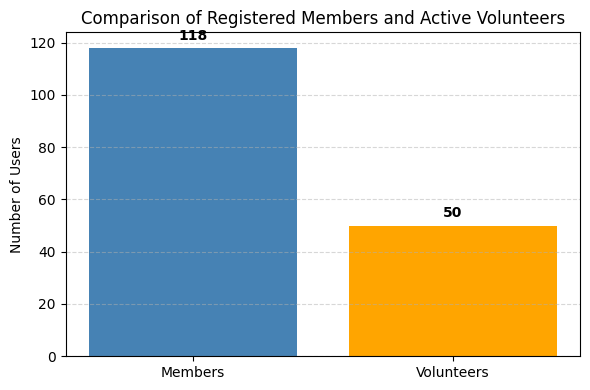

In [ ]:
import matplotlib.pyplot as plt

# Extract values from actual DataFrame
member_count = df_user_categories[df_user_categories['user_category'] == 'MEMBER']['total_users'].values[0]
volunteer_count = df_volunteers['total_volunteers'].values[0]

# Prepare data
categories = ['Members', 'Volunteers']
counts = [member_count, volunteer_count]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, counts, color=['steelblue', 'orange'])
plt.title('Comparison of Registered Members and Active Volunteers')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 2, f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



# Volunteer Skills Breakdown by **Popularity**

<ipython-input-68-58135ef6091f>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_skills = pd.read_sql(query, conn)


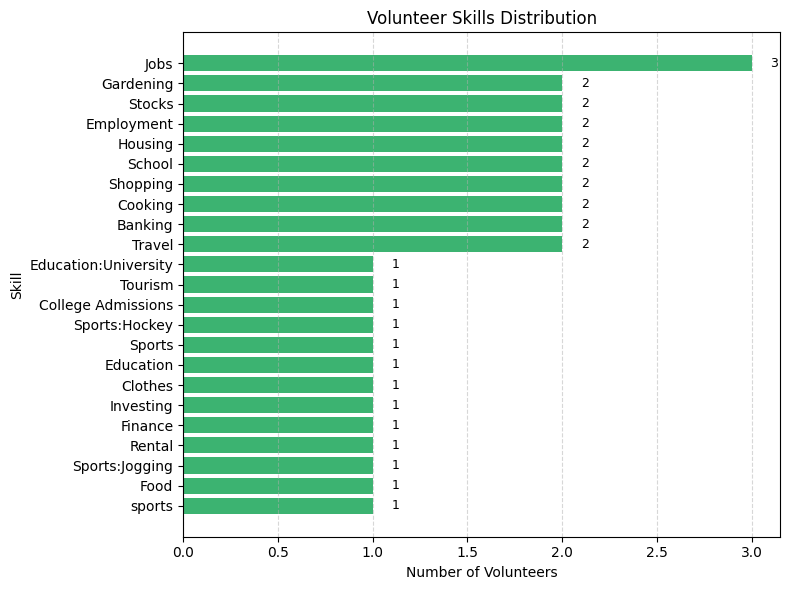

In [ ]:
# Step 1: Run the query again and save to df_skills
query = """
SELECT
  TRIM(UNNEST(STRING_TO_ARRAY(skills, ','))) AS skill,
  COUNT(*) AS total_volunteers
FROM volunteer_details
WHERE skills IS NOT NULL
GROUP BY skill
ORDER BY total_volunteers DESC;
"""
df_skills = pd.read_sql(query, conn)

# Step 2: Strip any extra spaces from column names
df_skills.columns = df_skills.columns.str.strip()

# Step 3: Sort the skills for a better-looking chart
df_skills_sorted = df_skills.sort_values(by='total_volunteers', ascending=True)

# Step 4: Plot the horizontal bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = plt.barh(df_skills_sorted['skill'], df_skills_sorted['total_volunteers'], color='mediumseagreen')
plt.title('Volunteer Skills Distribution')
plt.xlabel('Number of Volunteers')
plt.ylabel('Skill')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Add labels next to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             str(int(width)), va='center', fontsize=9)

plt.tight_layout()
plt.show()


# **Country-wise Distribution of Users**

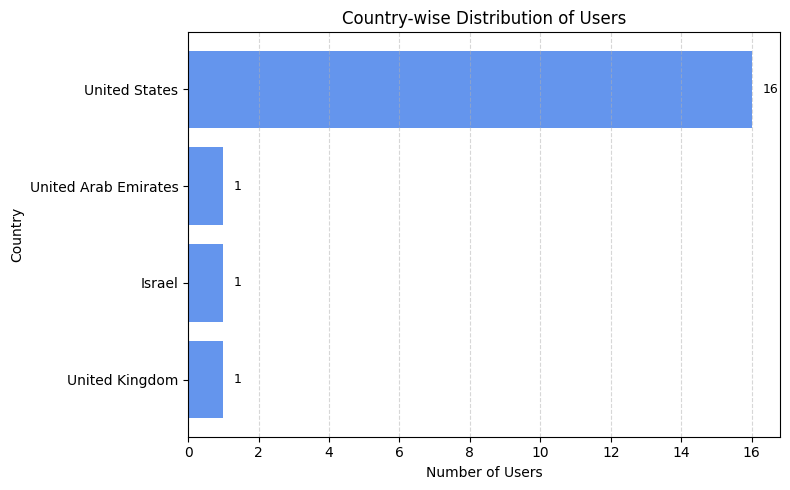

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Clean column names
df_country_users.columns = df_country_users.columns.str.strip()

# Step 2: Sort for better readability
df_country_users_sorted = df_country_users.sort_values(by='total_users', ascending=True)

# Step 3: Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(df_country_users_sorted['country'], df_country_users_sorted['total_users'], color='cornflowerblue')

plt.title('Country-wise Distribution of Users')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Step 4: Add labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height() / 2,
             str(int(width)), va='center', fontsize=9)

plt.tight_layout()
plt.show()


# **Volunteer Availability by Day**

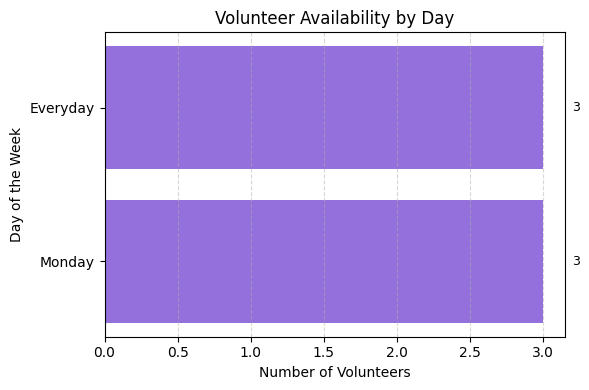

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Remove duplicates to ensure accurate counting
df_user_availability_cleaned = df_user_availability[['user_id', 'day_of_week']].drop_duplicates()

# Step 2: Count how many unique users are available each day
availability_counts = df_user_availability_cleaned['day_of_week'].value_counts().sort_values(ascending=True)

# Step 3: Plot the bar chart
plt.figure(figsize=(6, 4))
bars = plt.barh(availability_counts.index, availability_counts.values, color='mediumpurple')
plt.title('Volunteer Availability by Day')
plt.xlabel('Number of Volunteers')
plt.ylabel('Day of the Week')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Step 4: Add count labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             str(int(width)), va='center', fontsize=9)

plt.tight_layout()
plt.show()


# Volunteer Start Time **Distribution**

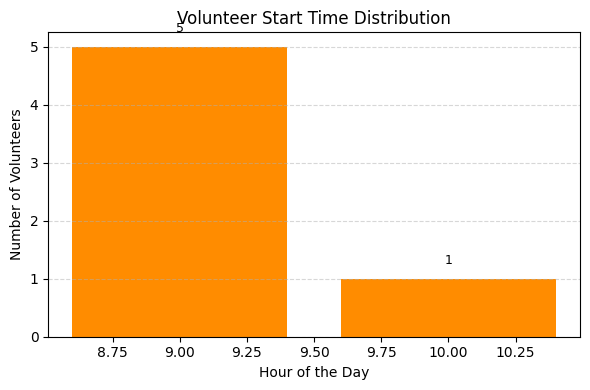

In [ ]:
# Convert start_time to just hour if needed
df_user_availability['start_hour'] = pd.to_datetime(df_user_availability['start_time']).dt.hour

# Count volunteers by start hour
hour_counts = df_user_availability['start_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(hour_counts.index, hour_counts.values, color='darkorange')
plt.title('Volunteer Start Time Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Volunteers')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Label counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.2, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# **User Distribution by Status**

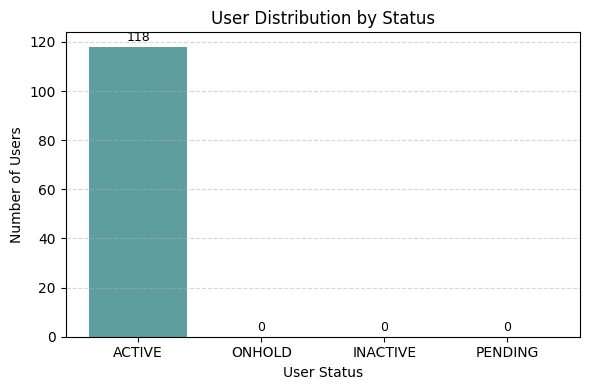

In [ ]:
import matplotlib.pyplot as plt

# Clean column names
df_user_status.columns = df_user_status.columns.str.strip()

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(df_user_status['user_status'], df_user_status['total_users'], color='cadetblue')
plt.title('User Distribution by Status')
plt.xlabel('User Status')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
conn.close()